In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel
import ipywidgets as widgets
from sympy import *

20200841

Gianfranco Polar

# Reporte 5

## Lectura

El artículo “Inflation Targeting in Peru: The Reasons for the Success”, elaborado por Óscar Dancourt, busca responder cuál es el impacto de la política monetaria de metas de inflación del Banco Central de Reserva en el buen desempeño macroeconómico del Perú durante la década 2002-2013. Para ello, Dancourt centra su análisis en la política monetaria en los que él considera los dos canales más importantes e influyentes en la actividad económica y el nivel de precios: el canal de crédito y el canal de tipo de cambio. 

Dancourt evalúa el impacto de medidas como el coeficiente de encaje y la tasa de interés de referencia en la oferta y demanda de crédito en la banca comercial privada. Concluye que el crédito en el Perú se expandió y se desdolarizó. Dancourt llega a esta conclusión tomando en cuenta también factores externos como la crisis de 2008-2009 que limitó el financiamiento externo reduciendo el crédito en moneda extranjera, así como variables internas como el desarrollo del mercado local de bonos públicos. Asimismo, en el canal del tipo de cambio, Dancourt sostiene que el Banco Central de Reserva tomó medidas acertadas pero incompletas frente a los choques externos adversos. Esta capacidad de considerar múltiples factores para el análisis de la situación macroeconómica del Perú, más allá de la política monetaria, es una de las grandes fortalezas del artículo. Por otro lado, se podría considerar como una debilidad del artículo el hecho de que no contempla elementos de la política fiscal tomada en el período de análisis, que también contribuyeron a preservar la estabilidad macroeconómica del Perú.

La principal contribución del artículo son las recomendaciones que brinda al Banco Central de Reserva que permitirían elaborar una política monetaria que no dependa tanto de la tasa de interés de referencia. Estas son: la intervención esterilizada en el mercado de divisas y la limitación del endeudamiento de los bancos comerciales en moneda extranjera. En ese sentido, un siguiente paso en la investigación sería evaluar el impacto que esas medidas han tenido en la estabilidad macroeconómica de otros países. Al respecto, Rosas (2011) sostiene que las economías emergentes tienden a tener “miedo a flotar”, por lo cual intervienen en el mercado de divisas para estabilizar su moneda. Esta es la medida optada por países de América Latina como Chile, México y Brasil para lograr sus metas de inflación. Sin embargo, esta medida puede ser contraproducente pues “resta competitividad a la producción doméstica y genera riesgos sistémicos por la aparición de los déficit gemelos, que causan reversiones violentas de capital externo de corto plazo”. Asimismo, compromete los ingresos públicos en pagar los intereses de una creciente deuda interna, obstaculizando la creación de infraestructura y otros estímulos a la inversión productiva.

**Bibliografía**

Rosas Rojas, E. (2011). Intervención esterilizada en los mercados de cambios de América Latina: Brasil, Chile y México. Problemas del desarrollo, 42(167). https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0301-70362011000400005 

## Código

### Encontrar las ecuaciones de Ingreso $(Y^e)$, tasa de interés $(r^e)$, $(P^e_q)$ de equilibrio (escriba paso a paso la derivación de estas ecuaciones).


1. ($Y^e$) Ingreso: $$ Y^e = [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})]$$

2. ($r^e$) Tasa de interés: $$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*\\
[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) ) $$

3. ($P^e$) Equilibrio: $$ P^e = P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) $$ 

In [60]:
#1--------------------------
    # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 40
Io = 45
Go = 40
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


# Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [61]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas
A = [P_AD[0], Y[0]]
B = [P_AD[-1], Y[-1]]

C = [P_AS[0], Y[0]]
D = [P_AS[-1], Y[-1]]

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(192.39043824701196, 50.79681274900399)

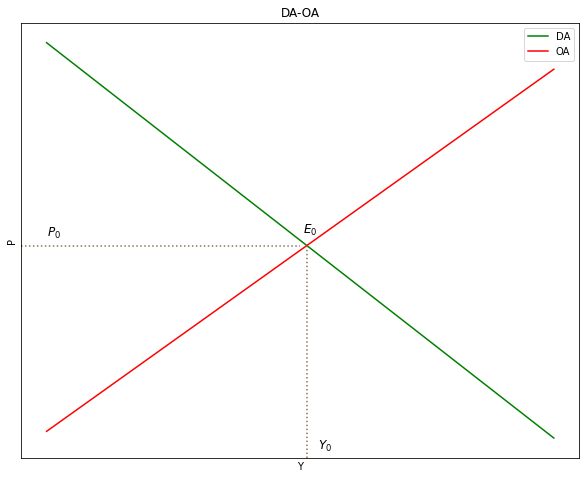

In [62]:
# Gráfico del modelo DA-OA

# Dimensiones del gráfico
y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "green")
ax.plot(Y, P_AS, label = "OA", color = "red") 

# Líneas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.5, linestyle = ":", color = "#8B7355")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "#8B7355")

# Texto agregado
plt.text(0, 200, '$P_0$', fontsize = 12, color = 'black')
plt.text(53, 25, '$Y_0$', fontsize = 12, color = 'black')
plt.text(50, 202, '$E_0$', fontsize = 12, color = 'black')


# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

### Estática comparativa
#### Analice los efectos sobre las variables endógenas P y r de una disminución del gasto fiscal $(∆G_0 < 0)$. El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P y r (modelo DA-OA).

**Análisis intuitivo**

En el modelo IS-LM

En el mercado de bienes:
$$ G_o↓ → DA↓ → DA < Y → Y↓ $$

En el mercado de dinero:
 $$ Y↓ → Md↓ → Md < Ms → r↓ $$

En el modelo DA-OA:
$$ Y↓ → θ(Y - \bar{Y})↓ → P↓ $$

**Análisis matemático**

En el modelo IS-LM

In [63]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)


In [64]:
df_Y_eq_Go = diff(Y_eq, Go)
df_Y_eq_Go

j/(h*k + j*(-(1 - t)*(b - m) + 1))

$$ \frac{∆Y_q^e}{∆G_o} = \frac{j}{hk + j(-(1-t)(b-m)+1} $$

$$ \frac{∆Y_q^e}{(-)} = (+) $$

$$ ∆Y_q^e = (+)(-) $$

$$ ∆Y_q^e = (-) $$

$$ ∆Y_q^e < 0 $$

In [65]:
df_r_eq_Go = diff(r_eq, Go)
df_r_eq_Go

k/(h*k + j*(-(1 - t)*(b - m) + 1))

$$ \frac{∆r_q^e}{∆G_o} = \frac{k}{hk + j(-(1-t)(b-m)+1} $$


$$ \frac{∆r_q^e}{(-)} = (+) $$


$$ ∆r_q^e = (+)(-) $$

$$ ∆r_q^e = (-) $$

$$ ∆r_q^e < 0 $$

En el modelo DA-OA

In [66]:
# nombrar variables como símbolos
h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ  = symbols('h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (((h*Ms+j*beta_0)/h) - (Pe + θ*_Y))/(θ - ((j*beta_1+h*r)/h))
P_eq = ((h*Ms+j*beta_0)/h) - (((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ))

In [67]:
df_Y_eq_Go = diff(Y_eq, Go)
df_Y_eq_Go

j/(h*(θ - (h*r + j*(-(1 - t)*(b - m) + 1))/h))

$$ \frac{∆Y_q^e}{∆G_o} = \frac{j}{h(θ - \frac{hr + j(-(1-t)(b-m)+1}{h})} $$

$$ \frac{∆Y_q^e}{(-)} = (+) $$

$$ ∆Y_q^e = (+)(-) $$

$$ ∆Y_q^e = (-) $$

$$ ∆Y_q^e < 0 $$

In [68]:
df_P_eq_Go = diff(P_eq, Go)
df_P_eq_Go

j/h

$$ \frac{∆P_q^e}{∆G_o} = \frac{j}{h} $$

$$ \frac{∆P_q^e}{(-)} = (+) $$

$$ ∆P_q^e = (+)(-) $$

$$ ∆P_q^e = (-) $$

$$ ∆P_q^e < 0 $$

In [69]:
# MODELO IS-LM

# Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 30
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#NUEVA curva IS: dismonución del gasto fiscal (Go)

# Definir SOLO el parámetro cambiado
Go = 25

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_Go = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

In [70]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [r[0], Y[0]] 
B = [r[-1], Y[-1]] 

C = [i[0], Y[0]] 
D = [i[-1], Y[-1]] 

E = [r_Go[0], Y[0]]
F = [r_Go[-1], Y[-1]] 

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(83.3969465648855, 54.19847328244275)

In [71]:
intersec2 = line_intersection((E, F), (C, D))
intersec2

(64.31297709923663, 44.65648854961832)

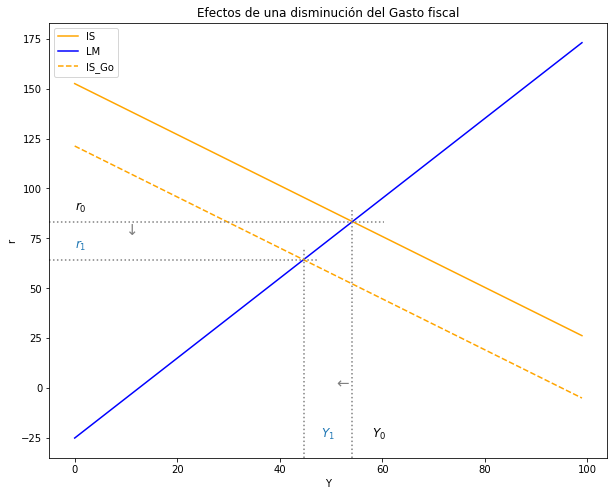

In [72]:
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))
#---------------------------------
    # Gráfico 1: IS-LM
    
ax.plot(Y, r, label = "IS", color = "orange") #IS
ax.plot(Y, i, label="LM", color = "blue")  #LM
ax.plot(Y, r_Go, label="IS_Go", color = "orange", linestyle ='dashed')  #IS

ax.axvline(x=intersec[1],  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
ax.axvline(x=intersec2[1],  ymin= 0, ymax= 0.48, linestyle = ":", color = "grey")
ax.axhline(y=intersec2[0],  xmin= 0, xmax= 0.48, linestyle = ":", color = "grey")
ax.axhline(y=intersec[0],  xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")

ax.text(51, 0, '←', fontsize=15, color='grey')
ax.text(10, 77, '↓', fontsize=15, color='grey')
ax.text(58, -25, '$Y_0$', fontsize=12, color='black')
ax.text(48, -25, '$Y_1$', fontsize=12, color='C0')
ax.text(0, 89, '$r_0$', fontsize=12, color='black')
ax.text(0, 70, '$r_1$', fontsize=12, color='C0')


ax.set(title="Efectos de una disminución del Gasto fiscal", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

In [73]:
#DA-OA

#Demanda agregada Original
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

Go = 25

B0 = Co + Io + Go + Xo

# Generar la ecuación con el nuevo parámetro

def P_AD_Go(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Go = P_AD_Go(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [74]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
G = [P_AD[0], Y[0]] 
H = [P_AD[-1], Y[-1]] 

I = [P_Go[0], Y[0]] 
J = [P_Go[-1], Y[-1]] 

K = [P_AS[0], Y[0]]
L = [P_AS[-1], Y[-1]] 

    # creación de intersección

intersec = line_intersection((G, H), (K, L))
intersec # (y,x)


(176.73306772908367, 55.57768924302789)

In [75]:
intersec2 = line_intersection((I, J), (K, L))
intersec2

(161.79282868525897, 50.59760956175299)

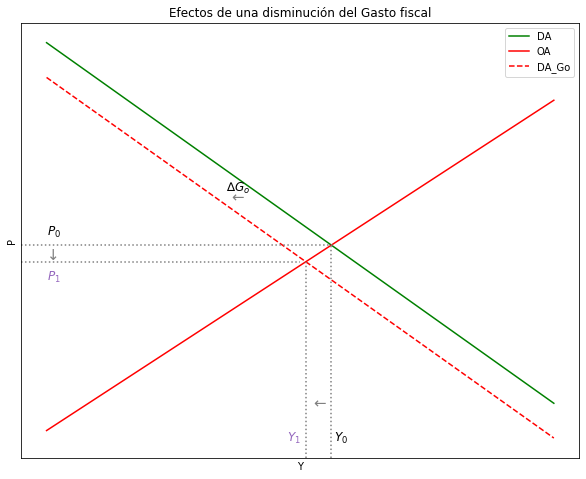

In [78]:
    # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P_AD)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "green") #DA
ax.plot(Y, P_AS, label = "OA", color = "red") #OA
ax.plot(Y, P_Go, label = "DA_Go", color = "red", linestyle = 'dashed') #OA_Pe

ax.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "grey")
ax.axvline(x=intersec2[1],  ymin= 0, ymax= 0.45, linestyle = ":", color = "grey")
ax.axhline(y=intersec2[0],  xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
ax.axhline(y=intersec[0],  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax.text(52, 30, '←', fontsize=15, color='grey')
ax.text(36, 215, '←', fontsize=15, color='grey')
ax.text(35, 225, '∆$G_o$', fontsize=12, color='black')
ax.text(0, 164, '↓', fontsize=15, color='grey')

ax.text(56, 0, '$Y_0$', fontsize=12, color='black')
ax.text(47, 0, '$Y_1$', fontsize=12, color='C4')
ax.text(0, 185, '$P_0$', fontsize=12, color='black')
ax.text(0, 145, '$P_1$', fontsize=12, color='C4')

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="Efectos de una disminución del Gasto fiscal", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

#### - Analice los efectos sobre las variables endógenas P y r de una disminución de la masa monetaria $(∆M^s < 0)$ . El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P y r (modelo DA-OA).

###### Análisis intuitivo

Modelo IS-LM
    
En el mercado de dinero:
$$ Ms↓ → Mo↓ → Mo < Md → r↑ $$
    
En el mercado de bienes:
$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$
    
Modelo DA-OA:    
$$ Y↓ → θ(Y-\bar{Y})↓ → P↓ $$

**Análisis matemático**

Modelo IS-LM

In [31]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [32]:
df_Y_eq_Ms = diff(Y_eq, Ms)
df_Y_eq_Ms

h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))

$$ \frac{∆Y_q^e}{∆Ms} = \frac{h}{P(hk + j(-(1-t)(b-m)+1)} $$

$$ \frac{∆Y_q^e}{(-)} = (+) $$

$$ ∆Y_q^e = (+)(-) $$

$$ ∆Y_q^e = (-) $$

$$ ∆Y_q^e < 0 $$

In [33]:
df_r_eq_Ms = diff(r_eq, Ms)
df_r_eq_Ms

-(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))

$$ \frac{∆r_q^e}{∆Ms} = - \frac{- (1-t)(b-m)+1}{P(hk + j(-(1-t)(b-m)+1))} $$

$$ \frac{∆r_q^e}{(-)} = (-) $$

$$ ∆r_q^e = (-)(-) $$

$$ ∆r_q^e = (+) $$

$$ ∆r_q^e > 0 $$

Modelo DA-OA

In [34]:
# nombrar variables como símbolos
h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ  = symbols('h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (((h*Ms+j*beta_0)/h) - Pe + θ*_Y)/(θ + ((j*beta_1+h*r)/h))
P_eq = ((h*Ms+j*beta_0)/h) - (((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ))

In [35]:
df_Y_eq_Ms = diff(Y_eq, Ms)
df_Y_eq_Ms

1/(θ + (h*r + j*(-(1 - t)*(b - m) + 1))/h)

$$ \frac{∆Y_q^e}{∆Ms} = \frac{1}{θ + \frac{hr + j(-(1-t)(b-m)+1}{h})} $$

$$ \frac{∆Y_q^e}{(-)} = (+) $$

$$ ∆Y_q^e = (+)(-) $$

$$ ∆Y_q^e = (-) $$

$$ ∆Y_q^e < 0 $$

In [36]:
df_P_eq_Ms = diff(P_eq, Ms)
df_P_eq_Ms

1

$$ \frac{∆P_q^e}{∆Ms} = 1 $$

$$ \frac{∆P_q^e}{(-)} = (+) $$

$$ ∆P_q^e = (+)(-) $$

$$ ∆P_q^e = (-) $$

$$ ∆P_q^e < 0 $$


**Análisis gráfico**

In [79]:
# IS-LM

# Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


# Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 500             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
Ms = 200

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

In [87]:
#DA-OA

# DA ORIGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 275             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#NUEVA DA

# Definir SOLO el parámetro cambiado

Ms = 200

# Generar la ecuación con el nuevo parámetro

def P_AD_Ms(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Ms = P_AD_Ms(h, Ms, j, B0, B1, k, Y)


# OA ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

<function matplotlib.pyplot.show(close=None, block=None)>

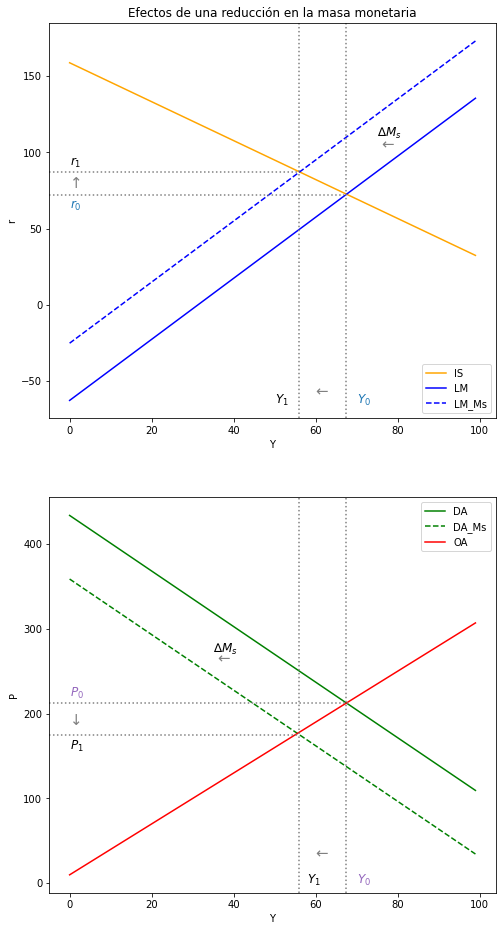

In [89]:

#---------------------------------
    # Gráfico 1: IS-LM
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 
ax1.plot(Y, r, label = "IS", color = "orange") #IS
ax1.plot(Y, i, label="LM", color = "blue")  #LM
ax1.plot(Y, i_Ms, label="LM_Ms", color = "blue", linestyle ='dashed')  #LM

ax1.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=72,  xmin= 0, xmax= 0.66, linestyle = ":", color = "grey")
ax1.axhline(y=87,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax1.text(75, 110, '∆$M_s$', fontsize=12, color='black')
ax1.text(76, 102, '←', fontsize=15, color='grey')
ax1.text(60, -60, '←', fontsize=15, color='grey')
ax1.text(0, 77, '↑', fontsize=15, color='grey')
ax1.text(50, -65, '$Y_1$', fontsize=12, color='black')
ax1.text(70, -65, '$Y_0$', fontsize=12, color='C0')
ax1.text(0, 91, '$r_1$', fontsize=12, color='black')
ax1.text(0, 63, '$r_0$', fontsize=12, color='C0')


ax1.set(title="Efectos de una reducción en la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax1.legend()

#---------------------------------
    # Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "DA", color = "green") #DA
ax2.plot(Y, P_Ms, label = "DA_Ms", color = "green", linestyle = 'dashed') #DA_Ms
ax2.plot(Y, P_AS, label = "OA", color = "red") #OA

ax2.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=213,  xmin= 0, xmax= 0.67, linestyle = ":", color = "grey")
ax2.axhline(y=175,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(60, 30, '←', fontsize=15, color='grey')
ax2.text(36, 260, '←', fontsize=15, color='grey')
ax2.text(35, 272, '∆$M_s$', fontsize=12, color='black')
ax2.text(0, 187, '↓', fontsize=15, color='grey')

ax2.text(58, 0, '$Y_1$', fontsize=12, color='black')
ax2.text(70, 0, '$Y_0$', fontsize=12, color='C4')
ax2.text(0, 158, '$P_1$', fontsize=12, color='black')
ax2.text(0, 220, '$P_0$', fontsize=12, color='C4')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show

#### - Analice los efectos sobre las variables endógenas P y r de un incremento de la tasa de impuestos $(∆t > 0)$. El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P y r (modelo DA-OA).

**Análisis intuitivo**

Modelo IS-LM

En el mercado de bienes:    
$$ t↑ → C↓ → DA↓ → DA < Y → Y↓ $$
    
En el mercado de dinero:
$$ Y↓ → M_d↓ → M_d < M_S → r↓ $$
    
Modelo DA-OA:
$$ Y↓ → θ(Y-\bar{Y})↓ → P↓ $$


**Análisis gráfico**

Modelo IS-LM

In [39]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [40]:
# Diferencia para el nivel de producción de equilibrio:
df_Y_eq_t = diff(Y_eq, t)
df_Y_eq_t

-Ms*h*j*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - j**2*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2

$$ \frac{∆Y_q^e}{∆t} = - \frac{M_shj(b - m)}{P(hk + j(- (1 - t)(b - m) + 1))^2} - \frac{j^2(b - m)(C_0 + G_0 + I_0 + X_0)}{(hk + j(- (1 - t)(b - m) + 1))^2} $$

$$ \frac{∆Y_q^e}{(+)} = (-) $$

$$ ∆Y_q^e = (-)(+) $$

$$ ∆Y_q^e = (-) $$

$$ ∆Y_q^e < 0 $$

In [41]:
df_r_eq_t = diff(r_eq, t)
df_r_eq_t

Ms*j*(b - m)*(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - Ms*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))) - j*k*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2

$$ \frac{∆r_q^e}{∆t} = \frac{M_sj(b - m)(-(1 - t)(b - m) + 1)}{P(hk + j(- (1 - t)(b - m) + 1))^2} - \frac{M_s(b - m)}{P(hk + j(- (1 - t)(b - m) + 1))} - \frac{jk(b - m)(C_0 + G_0 + I_0 + X_0)}{(hk + j(- (1 - t)(b - m) + 1))^2} $$

$$ \frac{∆r_q^e}{(+)} = (+)(-)(+) $$

$$ ∆r_q^e = (-)(+) $$

$$ ∆r_q^e = (-) $$

$$ ∆r_q^e < 0 $$

Modelo DA-OA

In [42]:
# nombrar variables como símbolos
h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ  = symbols('h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (((h*Ms+j*beta_0)/h) - Pe + θ*_Y)/(θ + ((j*beta_1+h*r)/h))
P_eq = ((h*Ms+j*beta_0)/h) - (((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ))

In [43]:
# Diferencia para el nivel de producción de equilibrio:
df_Y_eq_t = diff(Y_eq, t)
df_Y_eq_t

-j*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/(h*(θ + (h*r + j*(-(1 - t)*(b - m) + 1))/h)**2)

$$ \frac{∆Y_q^e}{∆t} = - \frac{j(b - m)(-Pe+_Yθ+\frac{M_sh(C_0 + G_0 + I_0 + X_0)}{h})}{h(θ + \frac{hk + j(- (1 - t)(b - m) + 1}{h})^2} $$

$$ \frac{∆Y_q^e}{(+)} = (-) $$

$$ ∆Y_q^e = (+)(-) $$

$$ ∆Y_q^e = (-) $$

$$ ∆Y_q^e < 0 $$

In [44]:
df_P_eq_t = diff(P_eq, t)
df_P_eq_t

-j*(b - m)*(P - Pe - _Y*θ)/(h*θ)

$$ \frac{∆P_q^e}{∆t} = - \frac{j(b - m)(P - Pe - _Yθ)}{hθ} $$

$$ \frac{∆P_q^e}{(+)} = (-) $$

$$ ∆P_q^e = (+)(-) $$

$$ ∆P_q^e = (-) $$

$$ ∆P_q^e < 0 $$

**Análisis gráfico**

In [47]:
# Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 40
Io = 45
Go = 40
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.1

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


# Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_t = i_LM( k, j, Ms, P, Y)

In [48]:
# NUEVA curva IS: 
    
# Definir SOLO el parámetro cambiado
t = 3

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t1 = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

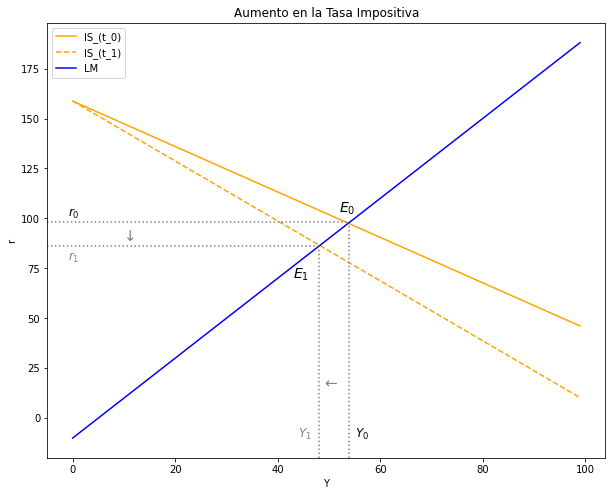

In [49]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i_t)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_t, label = "IS_(t_0)", color = "orange") #IS_orginal
ax.plot(Y, r_t1, label = "IS_(t_1)", color = "orange", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i_t, label="LM", color = "blue")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=48,  ymin= 0, ymax= 0.48, linestyle = ":", color = "grey")
plt.axhline(y=86, xmin= 0, xmax= 0.48, linestyle = ":", color = "grey")

plt.axvline(x=54,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")
plt.axhline(y=98, xmin= 0, xmax= 0.54, linestyle = ":", color = "grey")

plt.text(43,70, '$E_1$', fontsize = 14, color = 'black')
plt.text(52,103, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,101, '$r_0$', fontsize = 12, color = 'black')
plt.text(-1,79, '$r_1$', fontsize = 12, color = 'grey')
plt.text(55,-10, '$Y_0$', fontsize = 12, color = 'black')
plt.text(44,-10, '$Y_1$', fontsize = 12, color = 'grey')

plt.text(49, 15, '←', fontsize=15, color='grey')
plt.text(10, 89, '↓', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Aumento en la Tasa Impositiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

In [50]:
#DA-OA

# DA ORIGINAL
    
# Parámetros

Y_size = 100 

Co = 40
Io = 45
Go = 40
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.1

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD_t = P_AD(h, Ms, j, B0, B1, k, Y)


# OA ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS_t = P_AS(Pe, _Y, Y, θ)

In [51]:
# Nueva DA

# Definir SOLO el parámetro cambiado

t = 5

B1 = 1 - (b-m)*(1-t)

# Generar la ecuación con el nuevo parámetro

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD_t1 = P_AD(h, Ms, j, B0, B1, k, Y)

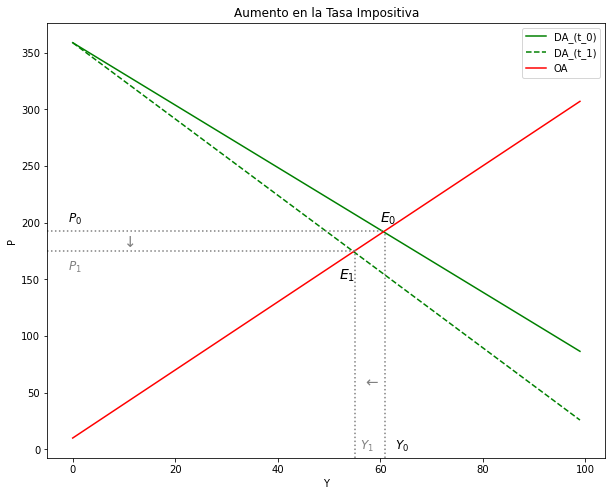

In [52]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(P_AS_t)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, P_AD_t1, label = "DA_(t_0)", color = "green") 
ax.plot(Y, P_AD_t, label = "DA_(t_1)", color = "green", linestyle = 'dashed')

ax.plot(Y, P_AS_t, label="OA", color = "red")  

# Texto y figuras agregadas
plt.axvline(x=55,  ymin= 0, ymax= 0.48, linestyle = ":", color = "grey")
plt.axhline(y=175, xmin= 0, xmax= 0.55, linestyle = ":", color = "grey")

plt.axvline(x=61,  ymin= 0, ymax= 0.52, linestyle = ":", color = "grey")
plt.axhline(y=193, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")

plt.text(52,150, '$E_1$', fontsize = 14, color = 'black')
plt.text(60,200, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,200, '$P_0$', fontsize = 12, color = 'black')
plt.text(-1,158, '$P_1$', fontsize = 12, color = 'grey')
plt.text(63,0, '$Y_0$', fontsize = 12, color = 'black')
plt.text(56, 0, '$Y_1$', fontsize = 12, color = 'grey')

plt.text(57, 55, '←', fontsize=15, color='grey')
plt.text(10, 179, '↓', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Aumento en la Tasa Impositiva", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()